## Creating Helper Functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-13 16:51:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-13 16:51:23 (47.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Import the helper functions
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

## Data Ingestion


In [ ]:
# Getting 10% of training data out of 10 classes of Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-10-13 16:51:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.207, 173.194.197.207, 64.233.191.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   141MB/s    in 1.1s    

2023-10-13 16:51:33 (141 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
# Create Training and Test Dir paths
train_dir= "10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE= 32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Check Batch of Data
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[2.12551022e+01 1.10255108e+01 2.71428561e+00]
   [2.09744892e+01 1.09285717e+01 2.06632638e+00]
   [2.33367348e+01 1.43367348e+01 5.61224556e+00]
   ...
   [4.14235001e+01 1.74234982e+01 1.49949713e+01]
   [3.83571434e+01 1.43571424e+01 1.23571424e+01]
   [4.28113327e+01 1.88113308e+01 1.68113308e+01]]

  [[2.66173477e+01 1.69540844e+01 1.21938801e+01]
   [2.85714302e+01 1.77142868e+01 1.35102062e+01]
   [3.03877563e+01 1.95306129e+01 1.53469400e+01]
   ...
   [3.93418159e+01 1.43418159e+01 1.03418159e+01]
   [4.09285736e+01 1.49285717e+01 1.39285717e+01]
   [3.93366699e+01 1.33366699e+01 1.23366699e+01]]

  [[3.79183655e+01 2.05612240e+01 1.74897938e+01]
   [3.68571434e+01 1.75714283e+01 1.35714283e+01]
   [3.59234695e+01 1.56377544e+01 1.09948969e+01]
   ...
   [4.04285507e+01 1.54285498e+01 1.14285498e+01]
   [4.18418465e+01 1.60561333e+01 1.44132748e+01]
   [4.16428223e+01 1.58571081e+01 1.42142506e+01]]

  ...

  [[1.88137741e+02 1.20137741e+02 7.35662689e+01]
   [1

## Building a Keras Functional API Model

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated)
base_model.trainable= False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# 4. If using ResNet50v2, You will need to normalize inputs
# x= tf.keras.layers.experimental.preprocessing.Rescaling(1./255) (inputs)

# 5.  Passing the inputs to the model
x=base_model(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggreegate all the most important information)
x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D:{x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="ouput_layer")(x)


# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_feature_extraction")])

24274472/24274472 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231013-165155
Epoch 1/5
24/24 [==============================] - 155s 6s/step - loss: 1.9315 - accuracy: 0.3947 - val_loss: 1.3451 - val_accuracy: 0.7072
Epoch 2/5
24/24 [==============================] - 133s 6s/step - loss: 1.1638 - accuracy: 0.7360 - val_loss: 0.9294 - val_accuracy: 0.8043
Epoch 3/5
24/24 [==============================] - 131s 6s/step - loss: 0.8552 - accuracy: 0.8013 - val_loss: 0.7298 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 90s 4s/step - loss: 0.7083 - accuracy: 0.8293 - val_loss: 0.6384 - val_accuracy: 0.8470
Epoch 5/5
24/24 [==============================] - 90s 4s/step - loss: 0.5881 - accuracy: 0.8680 - val_loss: 0.5699 - val_accuracy: 0.8635


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 158s 2s/step - loss: 0.5655 - accuracy: 0.8600


[0.5655183792114258, 0.8600000143051147]

In [ ]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 ouput_layer (Dense)         (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


## Running a series of transfer learning experiments
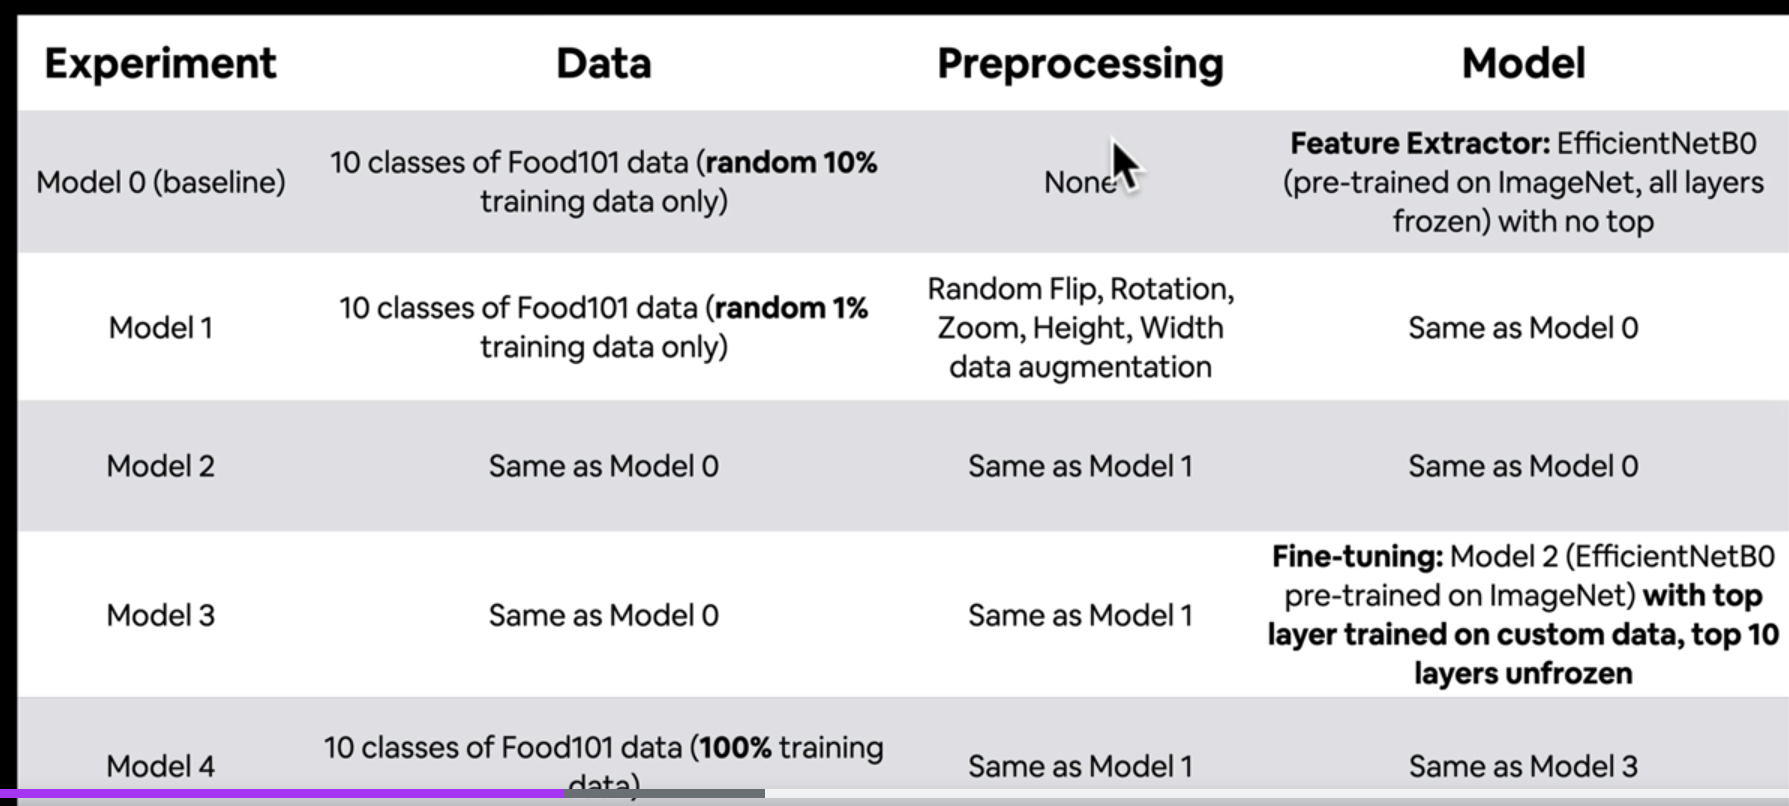

### Getting and Preprocessing Data for Model_1

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data('10_food_classes_1_percent.zip')

--2023-10-13 17:05:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.207, 172.217.214.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   103MB/s    in 1.2s    

2023-10-13 17:05:51 (103 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [ ]:
# Setup Data Loaders

IMG_SIZE= (224,224)
BATCH_SIZE=32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE,
                                                               batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data Augmentation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Adding data augmentation right into the model
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./255)
],name="data_augmentation")

10_food_classes_1_percent/train/ice_cream


Text(0.5, 1.0, 'Augmented Image: ice_cream')

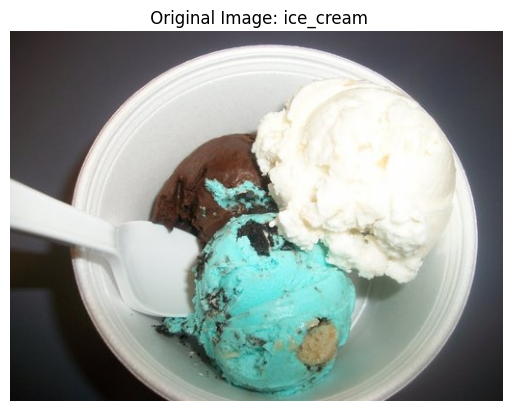

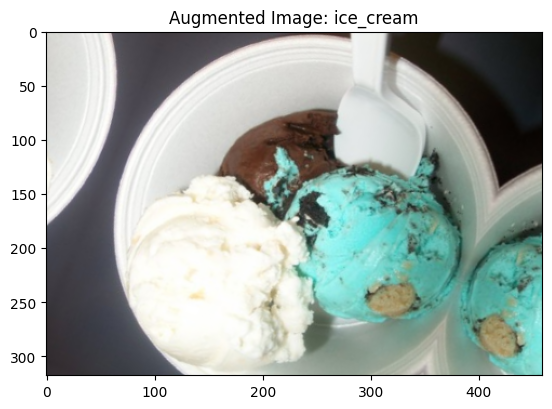

In [ ]:
### Visualizing Data Augmentation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class= random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"+ target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+ random_image

# Read the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f" Original Image: {target_class}")
plt.axis(False)
print(target_dir)


# Augmented Image
augmented_img= data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented Image: {target_class}")

### Model 1: Feature Extraction transfer learnign on 1% data with Data Augmentation

In [ ]:
input_shape =( 224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable= False


# Create input layer
inputs = layers.Input (shape=input_shape, name= "input_layer")

# Add in data augmentation Sequential model as a layer
x= data_augmentation(inputs)

# Give Base_model the inputs
x=base_model(x,training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D() (x)


# Put a dense layer on as the output
outputs= layers.Dense(10,activation="softmax",name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = keras.Model(inputs,outputs)


# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

# Fit the model
history_1_percent= model_1.fit(train_data_1_percent,
                               epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aig")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aig/20231013-170601
Epoch 1/5
3/3 [==============================] - 60s 23s/step - loss: 2.4314 - accuracy: 0.0429 - val_loss: 2.2916 - val_accuracy: 0.1595
Epoch 2/5
3/3 [==============================] - 87s 42s/step - loss: 2.1870 - accuracy: 0.2143 - val_loss: 2.1411 - val_accuracy: 0.2632
Epoch 3/5
3/3 [==============================] - 46s 22s/step - loss: 1.9770 - accuracy: 0.3714 - val_loss: 2.0314 - val_accuracy: 0.3536
Epoch 4/5
3/3 [==============================] - 47s 22s/step - loss: 1.7974 - accuracy: 0.5286 - val_loss: 1.9413 - val_accuracy: 0.3684
Epoch 5/5
3/3 [==============================] - 45s 21s/step - loss: 1.6607 - accuracy: 0.6286 - val_loss: 1.8333 - val_accuracy: 0.4457


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
# Evaluate the model
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 159s 2s/step - loss: 1.8412 - accuracy: 0.4476


[1.8411598205566406, 0.44760000705718994]

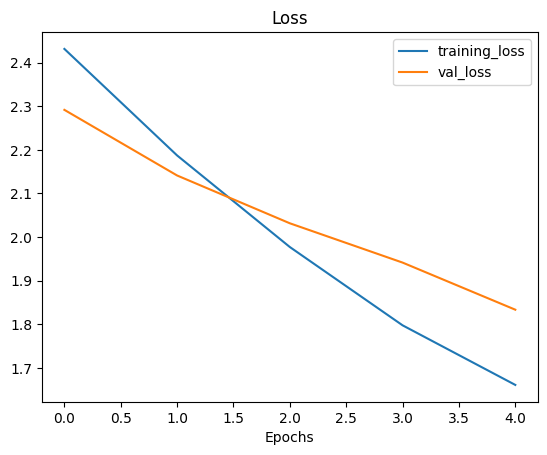

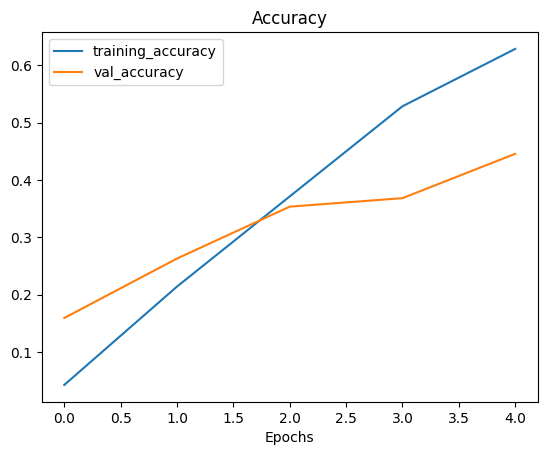

In [ ]:
# Plotting loss curves
plot_loss_curves(history_1_percent)

### Model 1: Feature Extraction transfer learning on 10% data with Data Augmentation

In [ ]:
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir= "/content/10_food_classes_10_percent/test"

In [ ]:
# Set Data Inputs
IMG_SIZE= (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Data Augmentation Layer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Adding data augmentation right into the model
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
    # preprocessing.Rescale(1./255)
],name="data_augmentation")

In [ ]:
input_shape =( 224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable= False


# Create input layer
inputs = layers.Input (shape=input_shape, name= "input_layer")

# Add in data augmentation Sequential model as a layer
x= data_augmentation(inputs)

# Give Base_model the inputs
x=base_model(x,training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D() (x)


# Put a dense layer on as the output
outputs= layers.Dense(10,activation="softmax",name="output_layer")(x)

# Make a model using the inputs and outputs
model_2 = keras.Model(inputs,outputs)


# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])


### Creating a ModelCHeckpoint Callback



In [ ]:
# Set checkpoint path
checkpoint_path= "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

### Fit Model-2 passing in the ModelCheckpoint Callbacks

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5

# Fit the model
history_10_percent= model_2.fit(train_data_1_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_1_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25 * len(test_data)),
                               callbacks=[checkpoint_callback,create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aig")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aig/20231013-171647
Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 2.3922 - accuracy: 0.0571
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 61s 23s/step - loss: 2.3922 - accuracy: 0.0571 - val_loss: 2.2485 - val_accuracy: 0.1349
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 2.1803 - accuracy: 0.1429
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 49s 23s/step - loss: 2.1803 - accuracy: 0.1429 - val_loss: 2.1322 - val_accuracy: 0.2105
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 1.9473 - accuracy: 0.3714
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 46s 22s/step - loss: 1.9473 - accuracy: 0.3714 - val_loss: 2.0351 - val_accuracy: 0.2697
Epoch 4/5
3/3 [=====

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 159s 2s/step - loss: 1.8704 - accuracy: 0.3664


[1.870419979095459, 0.36640000343322754]

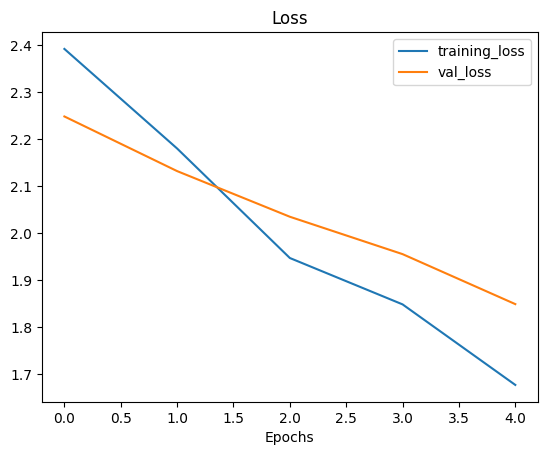

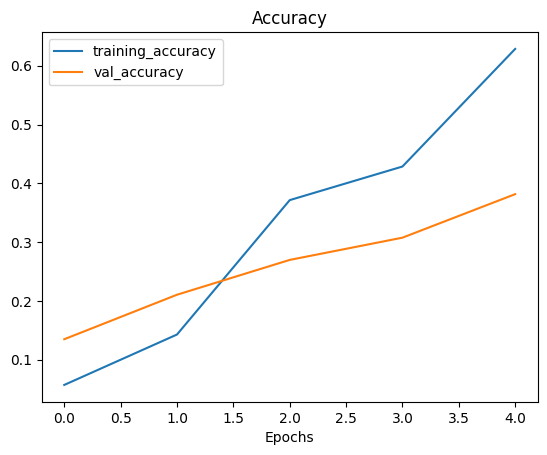

In [ ]:
plot_loss_curves(history_10_percent)